# Mille parole

Useful links:
- https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
- https://www.w3schools.com/python/python_regex.asp
- https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas
- https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
This function:
- reads the csv file with sorted words;
- does some data cleaning (remove _ADP, _VERB, _CONJ, ...);
- take only words longer than a certain number of characters;
- adds a column with cumulative sum.
'''
def sort_words(filename):
    df = pd.read_csv(filename, delimiter='\t')
    # Some data cleaning
    # Remove cathegorization _ADP, _VERB, _CONJ etc.
    # I.e., merge differet parts of speech into a single word
    df['word'] = df['word'].str.replace('_[A-Z]+$','', regex=True)
    # Take only words longer than a certain threshold.
    df = df[df['word'].str.len()>3]
    # Remove names, i.e., words starting with capital letter
    df = df[df['word'].str[0].str.islower()]
    # Group and sort.
    df = df.groupby('word').sum()
    df.sort_values(by=['count'], ascending=False, inplace=True)
    df.reset_index(inplace=True)
    # Cumulative sum.
    df['cumsum'] = df['count'].cumsum()
    sum_all = df['count'].sum()
    df['cumsum_percent'] = df['cumsum']/sum_all*100
    return df

In [3]:
df_eng = sort_words('eng_from_1950.csv')
df_ita = sort_words('ita_from_1950.csv')
df_fre = sort_words('fre_from_1950.csv')
df_ger = sort_words('ger_from_1950.csv')

In [4]:
df_ger

,word,count,cumsum,cumsum_percent
0,sich,454473056,454473056,2.088058
1,nicht,424622936,879095992,4.038970
2,eine,371820376,1250916368,5.747284
3,auch,309249458,1560165826,7.168118
4,werden,264447401,1824613227,8.383110
...,...,...,...,...
174005,visitas,1001,21765344745,99.999982
174006,heretical,1001,21765345746,99.999986
174007,wiedermal,1001,21765346747,99.999991
174008,hydrometeorologischen,1001,21765347748,99.999995


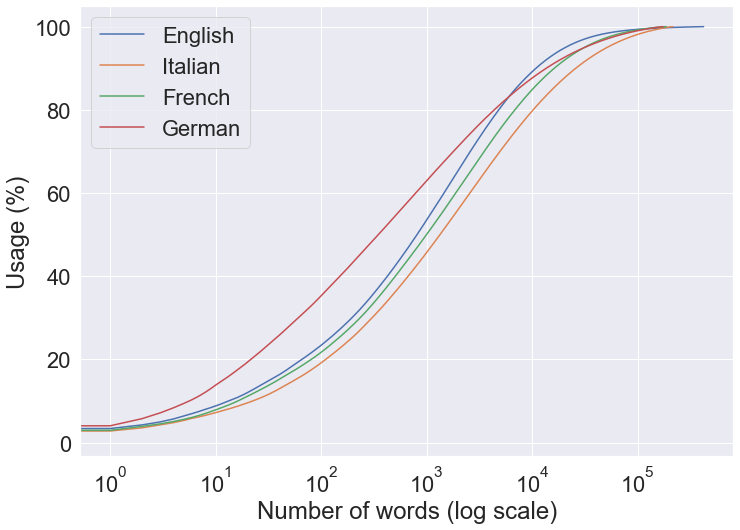

In [5]:
# Plot all datasets.

#sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale = 2)
#df_ita.plot(y='cumsum_percent', use_index=True, logx=True, xlabel = 'Number of words (log scale)', \
#        ylabel='Usage (%)', legend=True, label='Italian')
plt.plot(df_eng['cumsum_percent'], label='English')
plt.plot(df_ita['cumsum_percent'], label='Italian')
plt.plot(df_fre['cumsum_percent'], label='French')
plt.plot(df_ger['cumsum_percent'], label='German')

plt.xscale('log')
plt.xlabel('Number of words (log scale)')
plt.ylabel('Usage (%)')
plt.legend()
# Alternative approach to change font size in Seaborn: https://www.delftstack.com/howto/seaborn/seaborn-font-size/

plt.savefig('plot.png', bbox_inches='tight', dpi=300) 

In [76]:
def save_file(df, n_head, language):
    # Save file for the purpose of the *.md file. '##' is for the *.md file formatting.
    # df_tofile = '##' + df.head(n_head)['word'].astype(str)
    df.head(n_head).to_csv(f'top_{n_head}_words_{language}.csv')

In [77]:
save_file(df_eng, 1000, 'eng')
save_file(df_ita, 1000, 'ita')
save_file(df_fre, 1000, 'fre')

In [25]:
languages = {
    'French': df_fre,
    'Italian': df_ita,
    'English': df_eng,
    'German': df_ger
}

for language in languages:
    df = languages[language]
    words_40 = df[df['cumsum_percent']>=40].index[0]+1
    words_1000 = df['cumsum_percent'][999]
    words_total = df[df['cumsum_percent']>=40].index[-1]+1
    print(f'- {language}: {words_40} words are used 40% of the time, {words_total} words in total.')
    print(f'1000 words are used {words_1000:.1f}% of the time.\n')

- French: 505 words are used 40% of the time, 186158 words in total.
1000 words are used 50.0% of the time.

- Italian: 668 words are used 40% of the time, 215171 words in total.
1000 words are used 45.7% of the time.

- English: 425 words are used 40% of the time, 420513 words in total.
1000 words are used 53.5% of the time.

- German: 152 words are used 40% of the time, 174010 words in total.
1000 words are used 63.0% of the time.

